open cv 버전 차이로 기존 코드로는 다음과 같은 오류 발생

In [13]:
import cv2
import numpy as np

img = cv2.imread('./img/shapes.png')
img2 = img.copy()

# 그레이 스케일로 변환 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
im2, contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)
# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환 ---④
im2, contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)
# 각각의 컨투의 갯수 출력 ---⑤
print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색  ---⑥
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색  ---⑦
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 ---⑧
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1) 

# 컨투어 꼭지점 좌표를 작은 파랑색 점(원)으로 표시 ---⑨
for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 

# 결과 출력 ---⑩
cv2.imshow('CHAIN_APPROX_NONE', img)
cv2.imshow('CHAIN_APPROX_SIMPLE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: not enough values to unpack (expected 3, got 2)

In [19]:
cv2.__version__

'4.2.0'

다음과 같이 수정

도형의 갯수: 3(3)


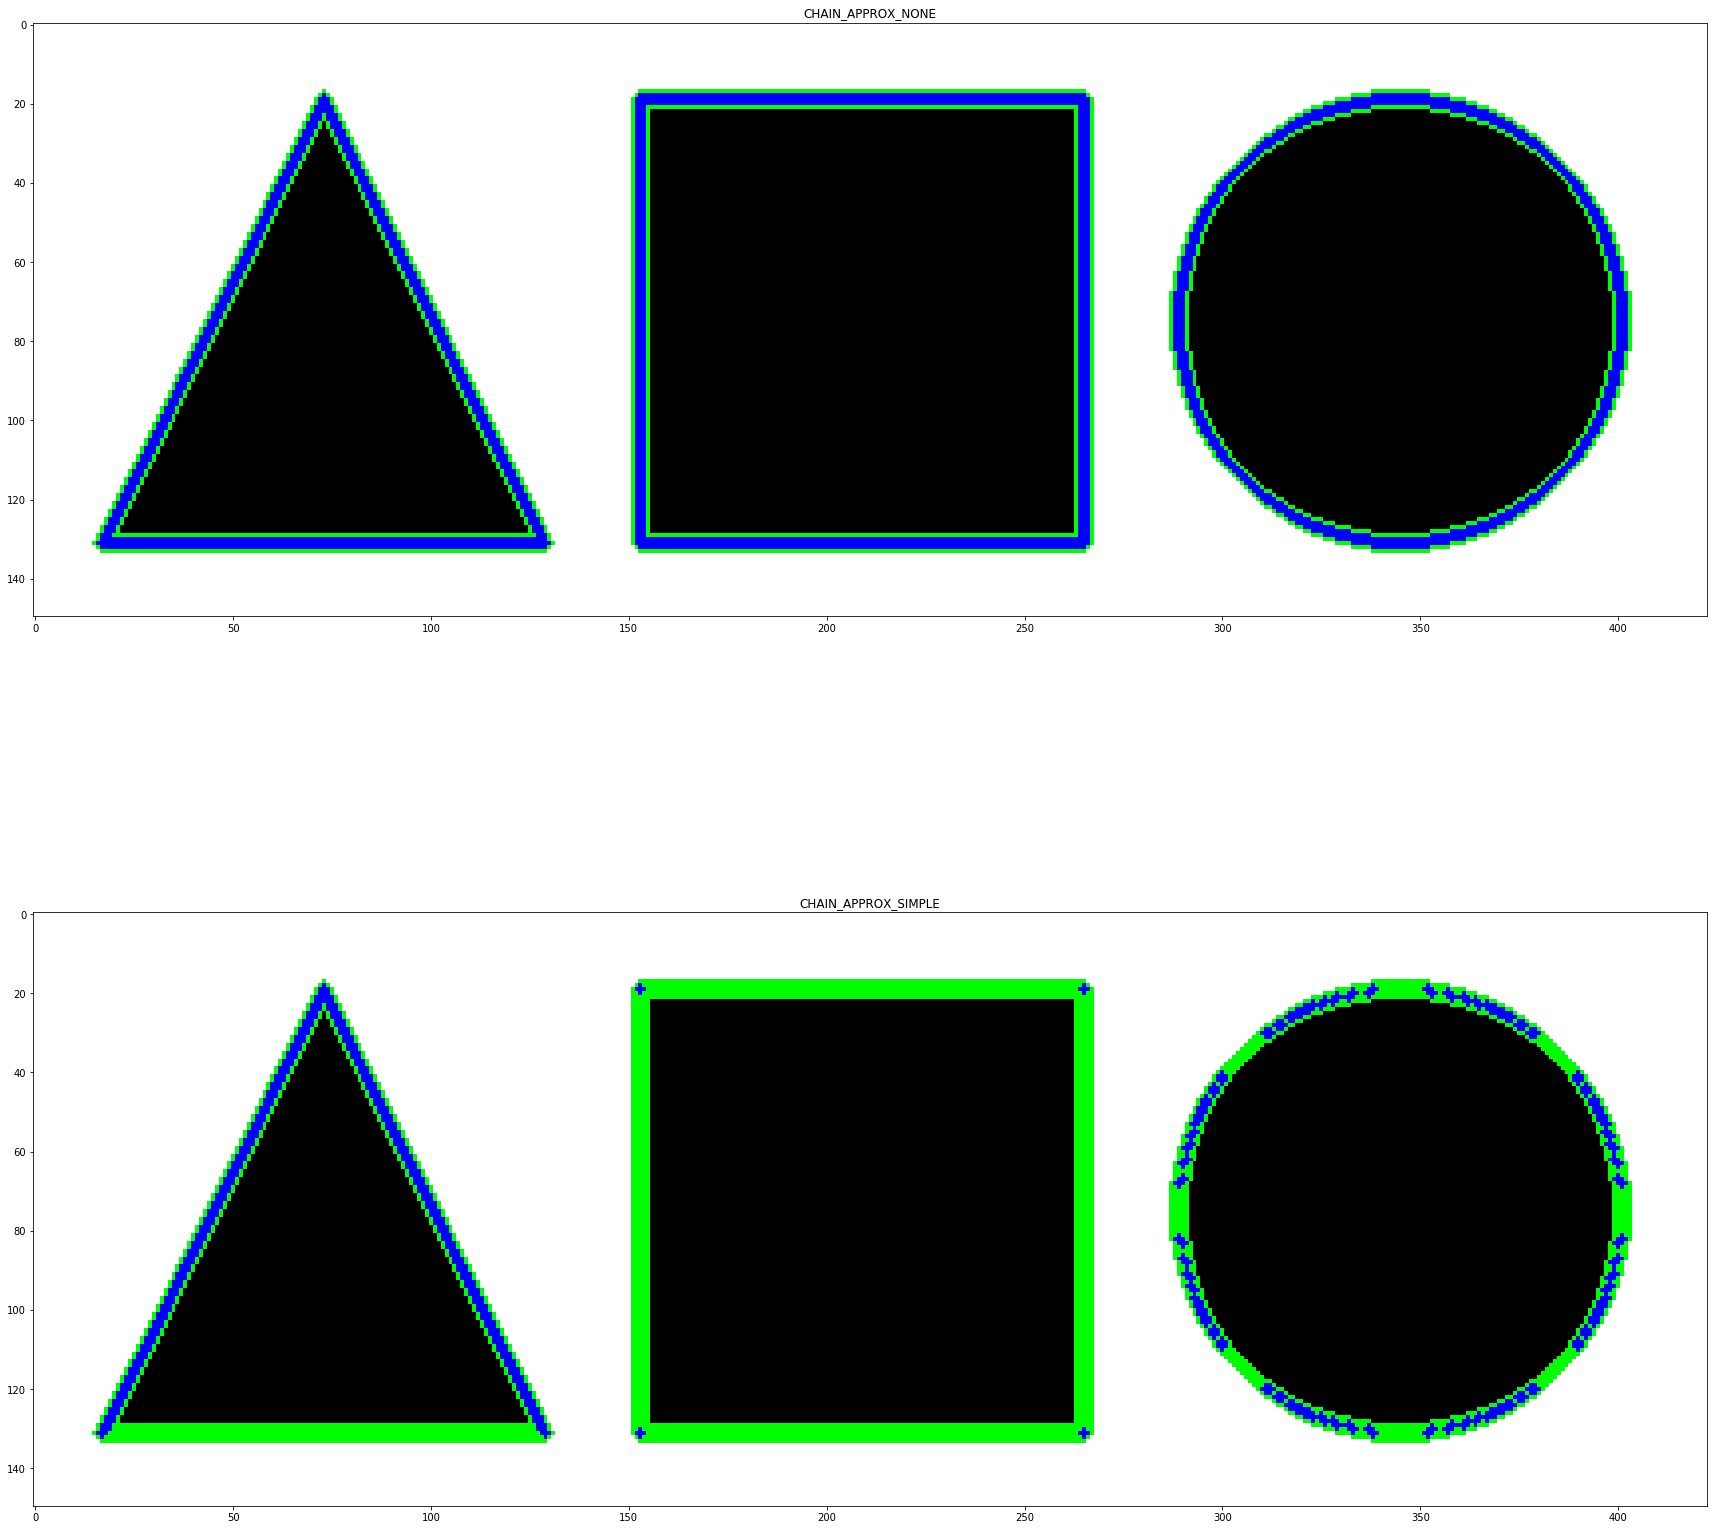

In [17]:
import cv2
import numpy as np

img = cv2.imread('./img/shapes.png')
img2 = img.copy()

# 그레이 스케일로 변환 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
#im2, 
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)
# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환 ---④
#im2, 
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)
# 각각의 컨투의 갯수 출력 ---⑤
print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색  ---⑥
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색  ---⑦
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 ---⑧
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1) 

# 컨투어 꼭지점 좌표를 작은 파랑색 점(원)으로 표시 ---⑨
for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 

# 결과 출력 ---⑩
cv2.imshow('CHAIN_APPROX_NONE', img)
cv2.imshow('CHAIN_APPROX_SIMPLE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'CHAIN_APPROX_NONE':img,'CHAIN_APPROX_SIMPLE':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

In [3]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('./img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집   --- ①
im2, contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_NONE)
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)

# 모든 컨투어를 트리 계층 으로 수집 ---③
im2, contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)
# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

# 화면 출력
cv2.imshow('RETR_EXTERNAL', img)
cv2.imshow('RETR_TREE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: not enough values to unpack (expected 3, got 2)

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


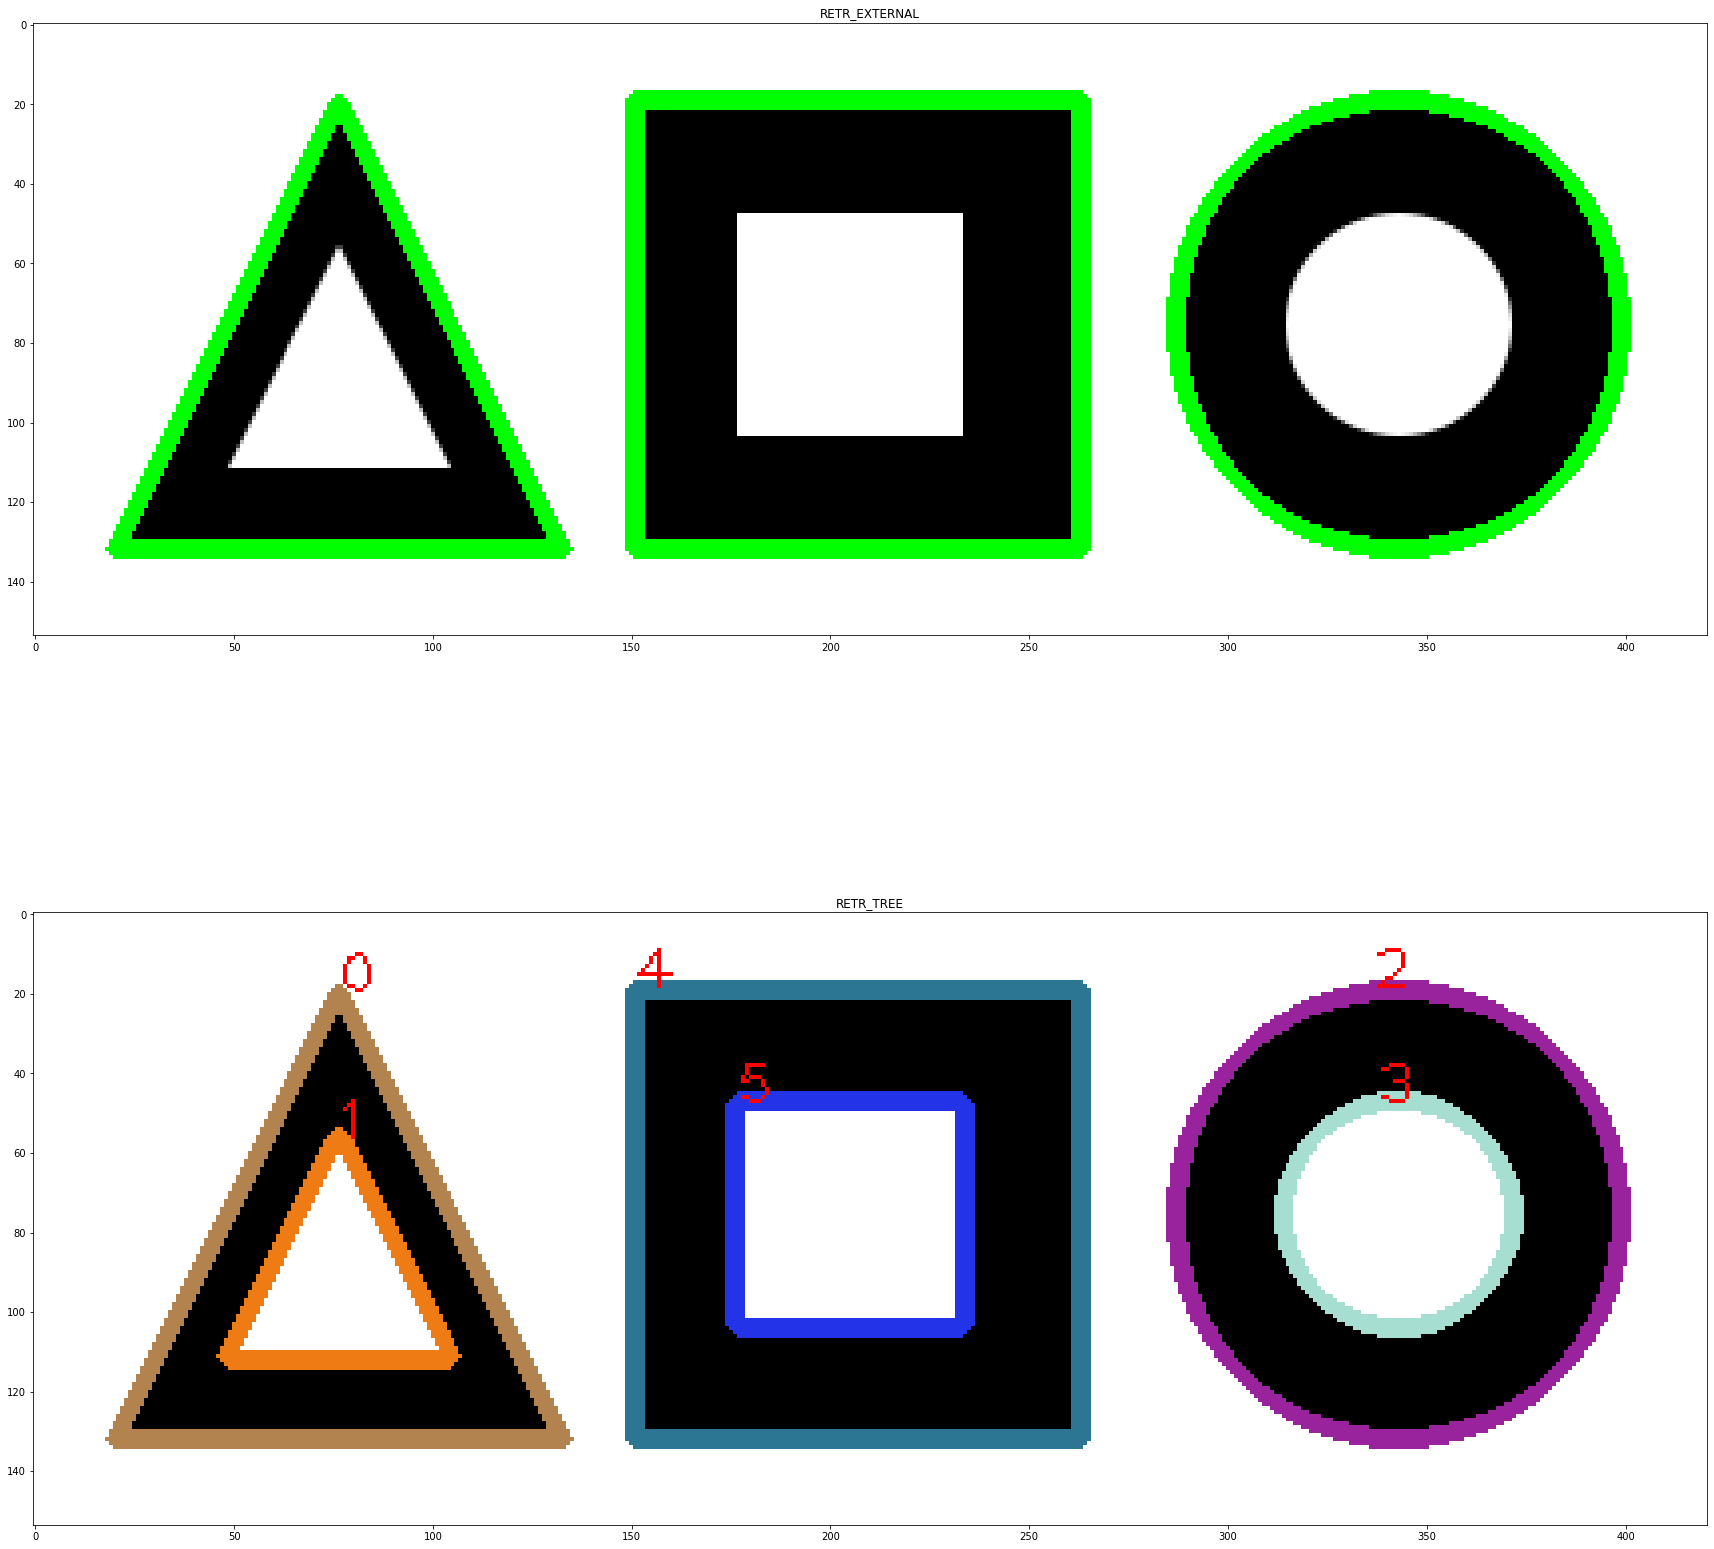

In [18]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('./img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집   --- ①
#im2, 
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_NONE)
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)

# 모든 컨투어를 트리 계층 으로 수집 ---③
#im2, 
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)
# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

# 화면 출력
cv2.imshow('RETR_EXTERNAL', img)
cv2.imshow('RETR_TREE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'RETR_EXTERNAL':img,'RETR_TREE':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

area:9870.00
area:12544.00
area:6216.00


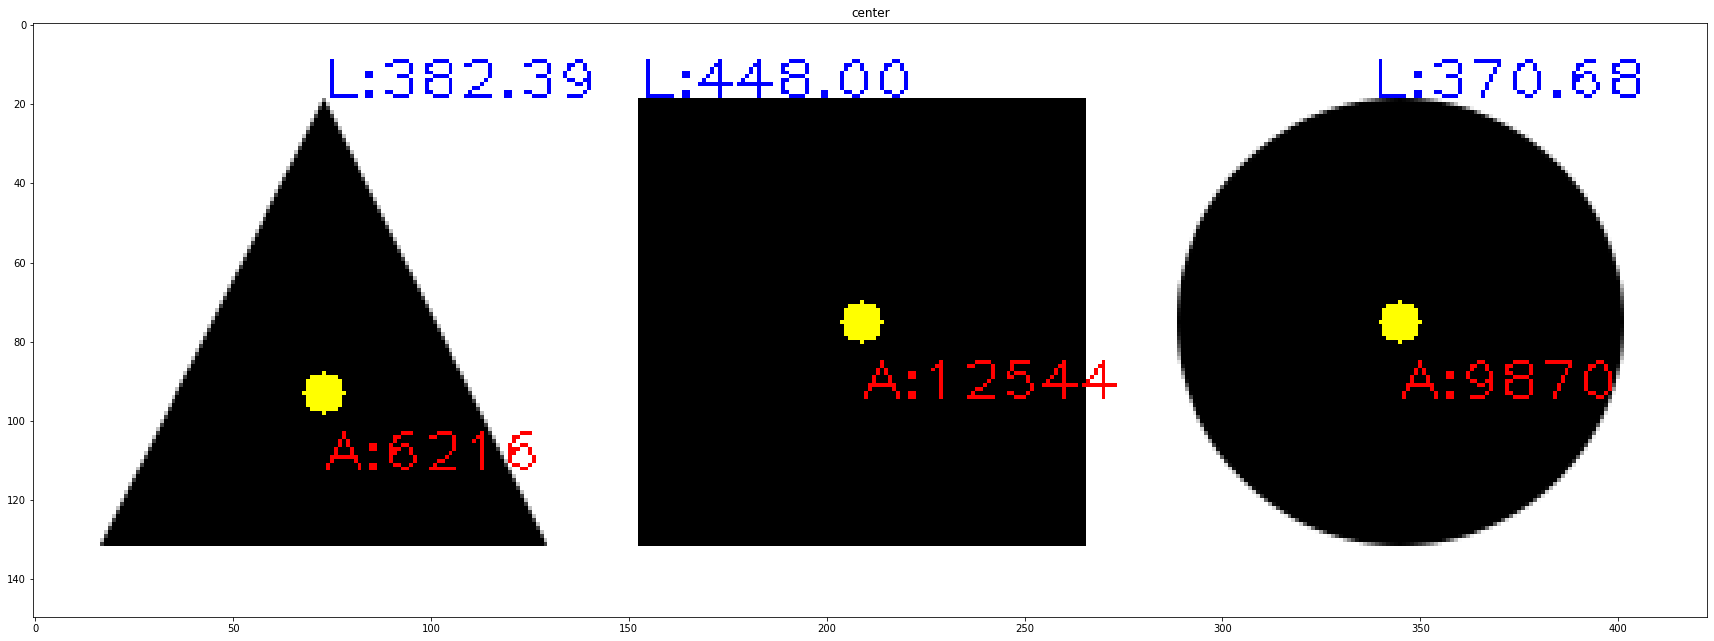

In [3]:
import cv2
import numpy as np

img = cv2.imread("./img/shapes.png")
# 그레이 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)

# 각 도형의 컨투어에 대한 루프
for c in contours:
    # 모멘트 계산
    mmt = cv2.moments(c)
    # m10/m00, m01/m00  중심점 계산
    cx = int(mmt['m10']/mmt['m00'])
    cy = int(mmt['m01']/mmt['m00'])
    # 영역 넓이
    a = mmt['m00']
    # 영역 외곽선 길이
    l = cv2.arcLength(c, True)
    # 중심점에 노란색 점 그리기
    cv2.circle(img, (cx, cy), 5, (0, 255, 255), -1)
    # 중심점 근처에 넓이 그리기
    cv2.putText(img, "A:%.0f"%a, (cx, cy+20) , cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))
    # 컨투어 시작점에 길이 그리기
    cv2.putText(img, "L:%.2f"%l, tuple(c[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (255,0,0))
    # 함수로 컨투어 넓이 계산해서 출력
    print("area:%.2f"%cv2.contourArea(c, False))

# 결과 출력
# cv2.imshow('center', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
#plt.rcParams["figure.figsize"] = (30,30)
plt.title('center')
plt.imshow(cv2tomat(img))

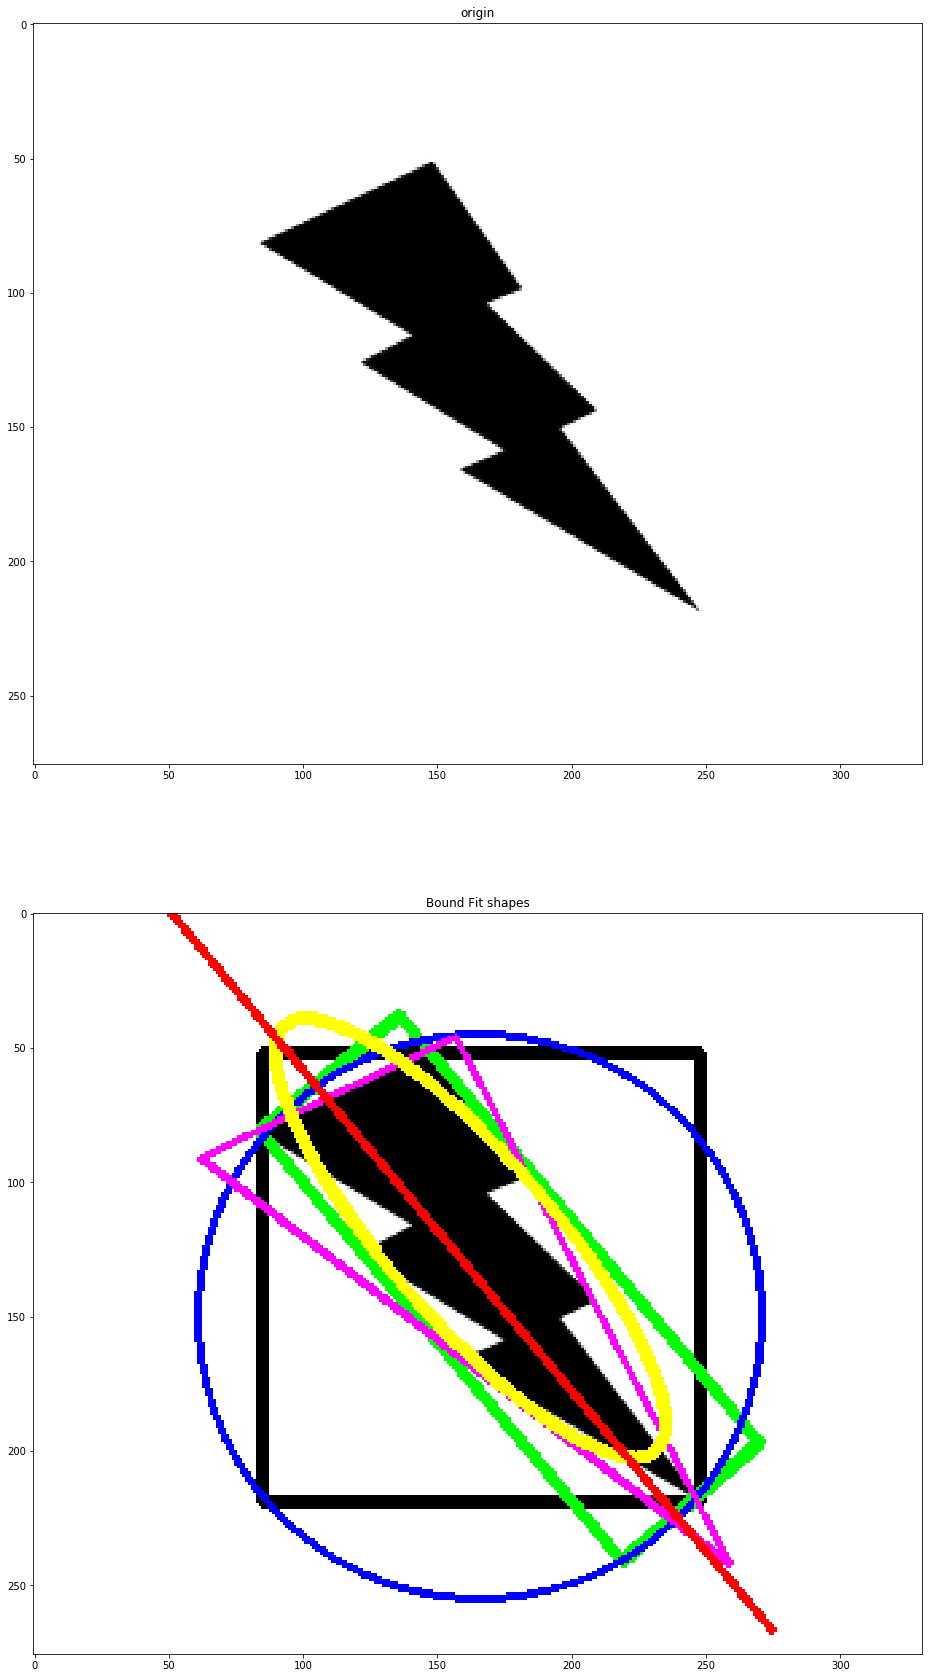

In [5]:
import cv2
import numpy as np

# 이미지 읽어서 그레이스케일 변환, 바이너리 스케일 변환
img = cv2.imread("./img/lightning.png")
img1=img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY_INV)

# 컨튜어 찾기
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)
contr = contours[0]

# 감싸는 사각형 표시(검정색)
x,y,w,h = cv2.boundingRect(contr)
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)   # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)          # 정수로 변환
cv2.drawContours(img, [box], -1, (0,255,0), 3)

# 최소한의 원 표시(파랑색)
(x,y), radius = cv2.minEnclosingCircle(contr)
cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0), 2)

# 최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(contr)
cv2.polylines(img, [np.int32(tri)], True, (255,0,255), 2)

# 최소한의 타원 표시(노랑색)
ellipse = cv2.fitEllipse(contr)
cv2.ellipse(img, ellipse, (0,255,255), 3)

# 중심점 통과하는 직선 표시(빨강색)
[vx,vy,x,y] = cv2.fitLine(contr, cv2.DIST_L2,0,0.01,0.01)
cols,rows = img.shape[:2]
cv2.line(img,(0, 0-x*(vy/vx) + y), (cols-1, (cols-x)*(vy/vx) + y), \
                                                        (0,0,255),2)

img2=img.copy()
# 결과 출력
# cv2.imshow('Bound Fit shapes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img1,'Bound Fit shapes':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

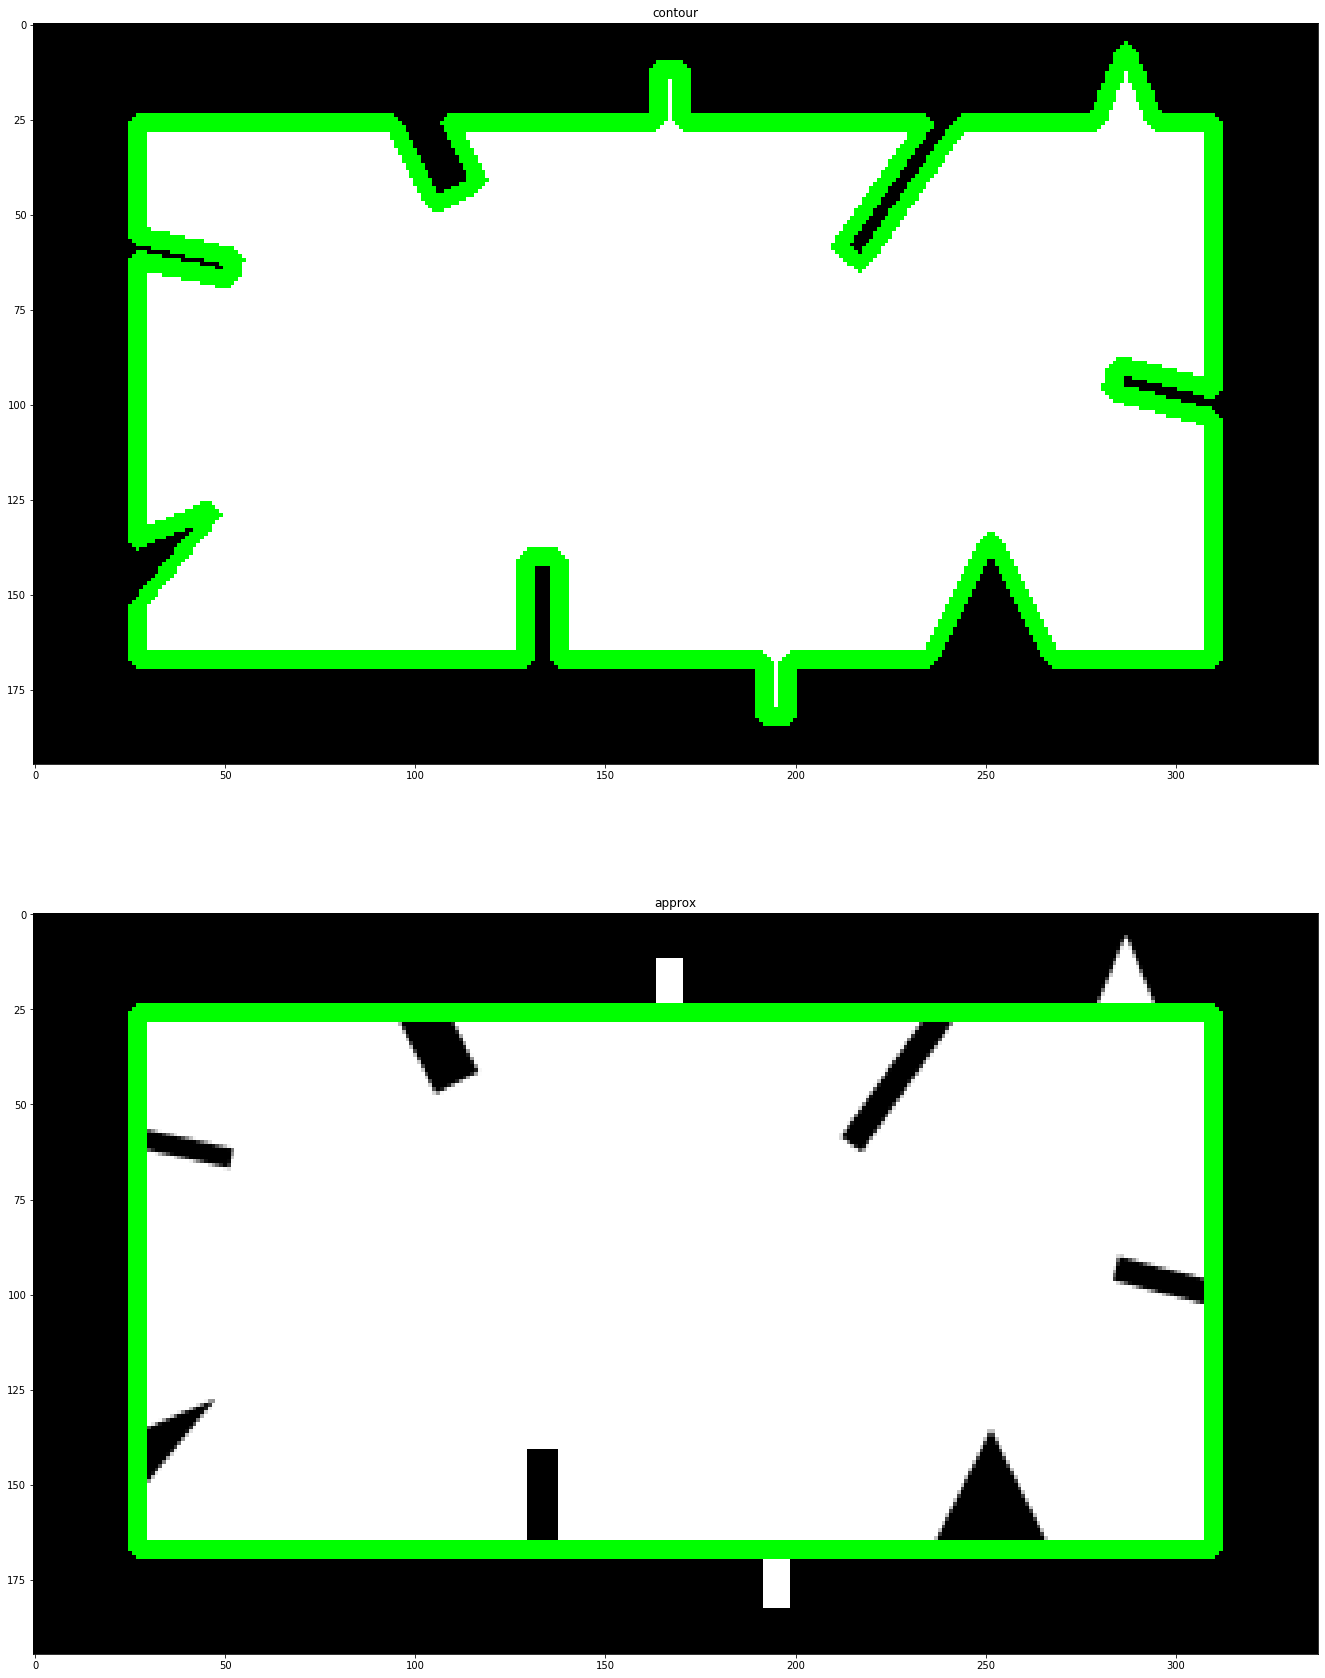

In [7]:
import cv2
import numpy as np

img = cv2.imread('./img/bad_rect.png')
img2 = img.copy()

# 그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기 ---①
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                     cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
# 전체 둘레의 0.05로 오차 범위 지정 ---②
epsilon = 0.05 * cv2.arcLength(contour, True)
# 근사 컨투어 계산 ---③
approx = cv2.approxPolyDP(contour, epsilon, True)

# 각각 컨투어 선 그리기 ---④
cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

# # 결과 출력
# cv2.imshow('contour', img)
# cv2.imshow('approx', img2)
# cv2.waitKey()
# cv2.destroyAllWindows()

#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'contour':img,'approx':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

False True


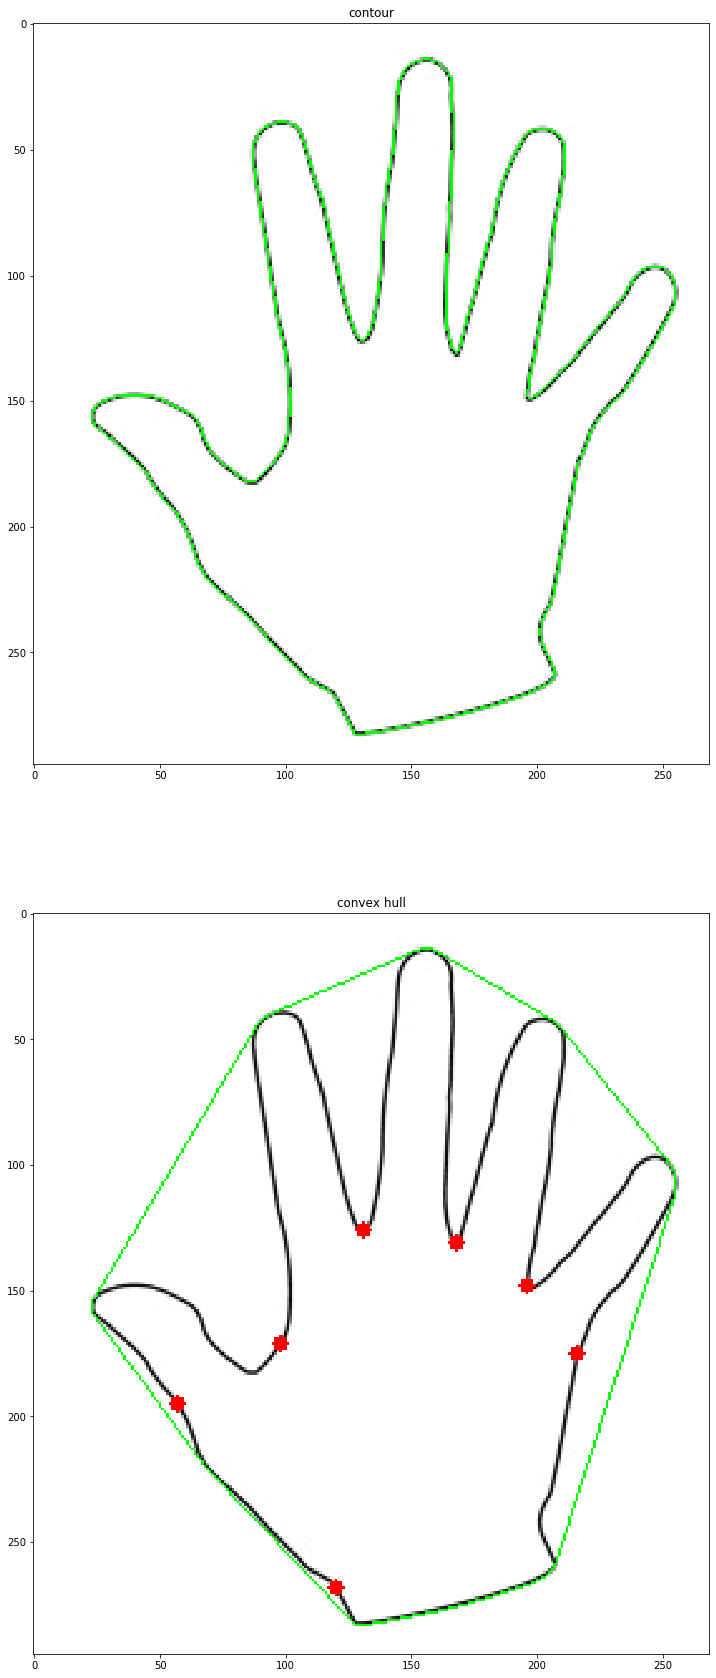

In [9]:
import cv2
import numpy as np

img = cv2.imread('./img/hand.jpg')
img2 = img.copy()
# 그레이 스케일 및 바이너리 스케일 변환 ---①
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 컨투어 찾기와 그리기 ---②
contours, heiarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                         cv2.CHAIN_APPROX_SIMPLE)
cntr = contours[0]
cv2.drawContours(img, [cntr], -1, (0, 255,0), 1)

# 볼록 선체 찾기(좌표 기준)와 그리기 ---③
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0), 1)
# 볼록 선체 만족 여부 확인 ---④
print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

# 볼록 선체 찾기(인덱스 기준) ---⑤
hull2 = cv2.convexHull(cntr, returnPoints=False)
# 볼록 선체 결함 찾기 ---⑥
defects = cv2.convexityDefects(cntr, hull2)
# 볼록 선체 결함 순회
for i in range(defects.shape[0]):
    # 시작, 종료, 가장 먼 지점, 거리 ---⑦
    startP, endP, farthestP, distance = defects[i, 0]
    # 가장 먼 지점의 좌표 구하기 ---⑧
    farthest = tuple(cntr[farthestP][0])
    # 거리를 부동 소수점으로 변환 ---⑨
    dist = distance/256.0
    # 거리가 1보다 큰 경우 ---⑩
    if dist > 1 :
        # 빨강색 점 표시 
        cv2.circle(img2, farthest, 3, (0,0,255), -1)
# # 결과 이미지 표시
# cv2.imshow('contour', img)
# cv2.imshow('convex hull', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'contour':img,'convex hull':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

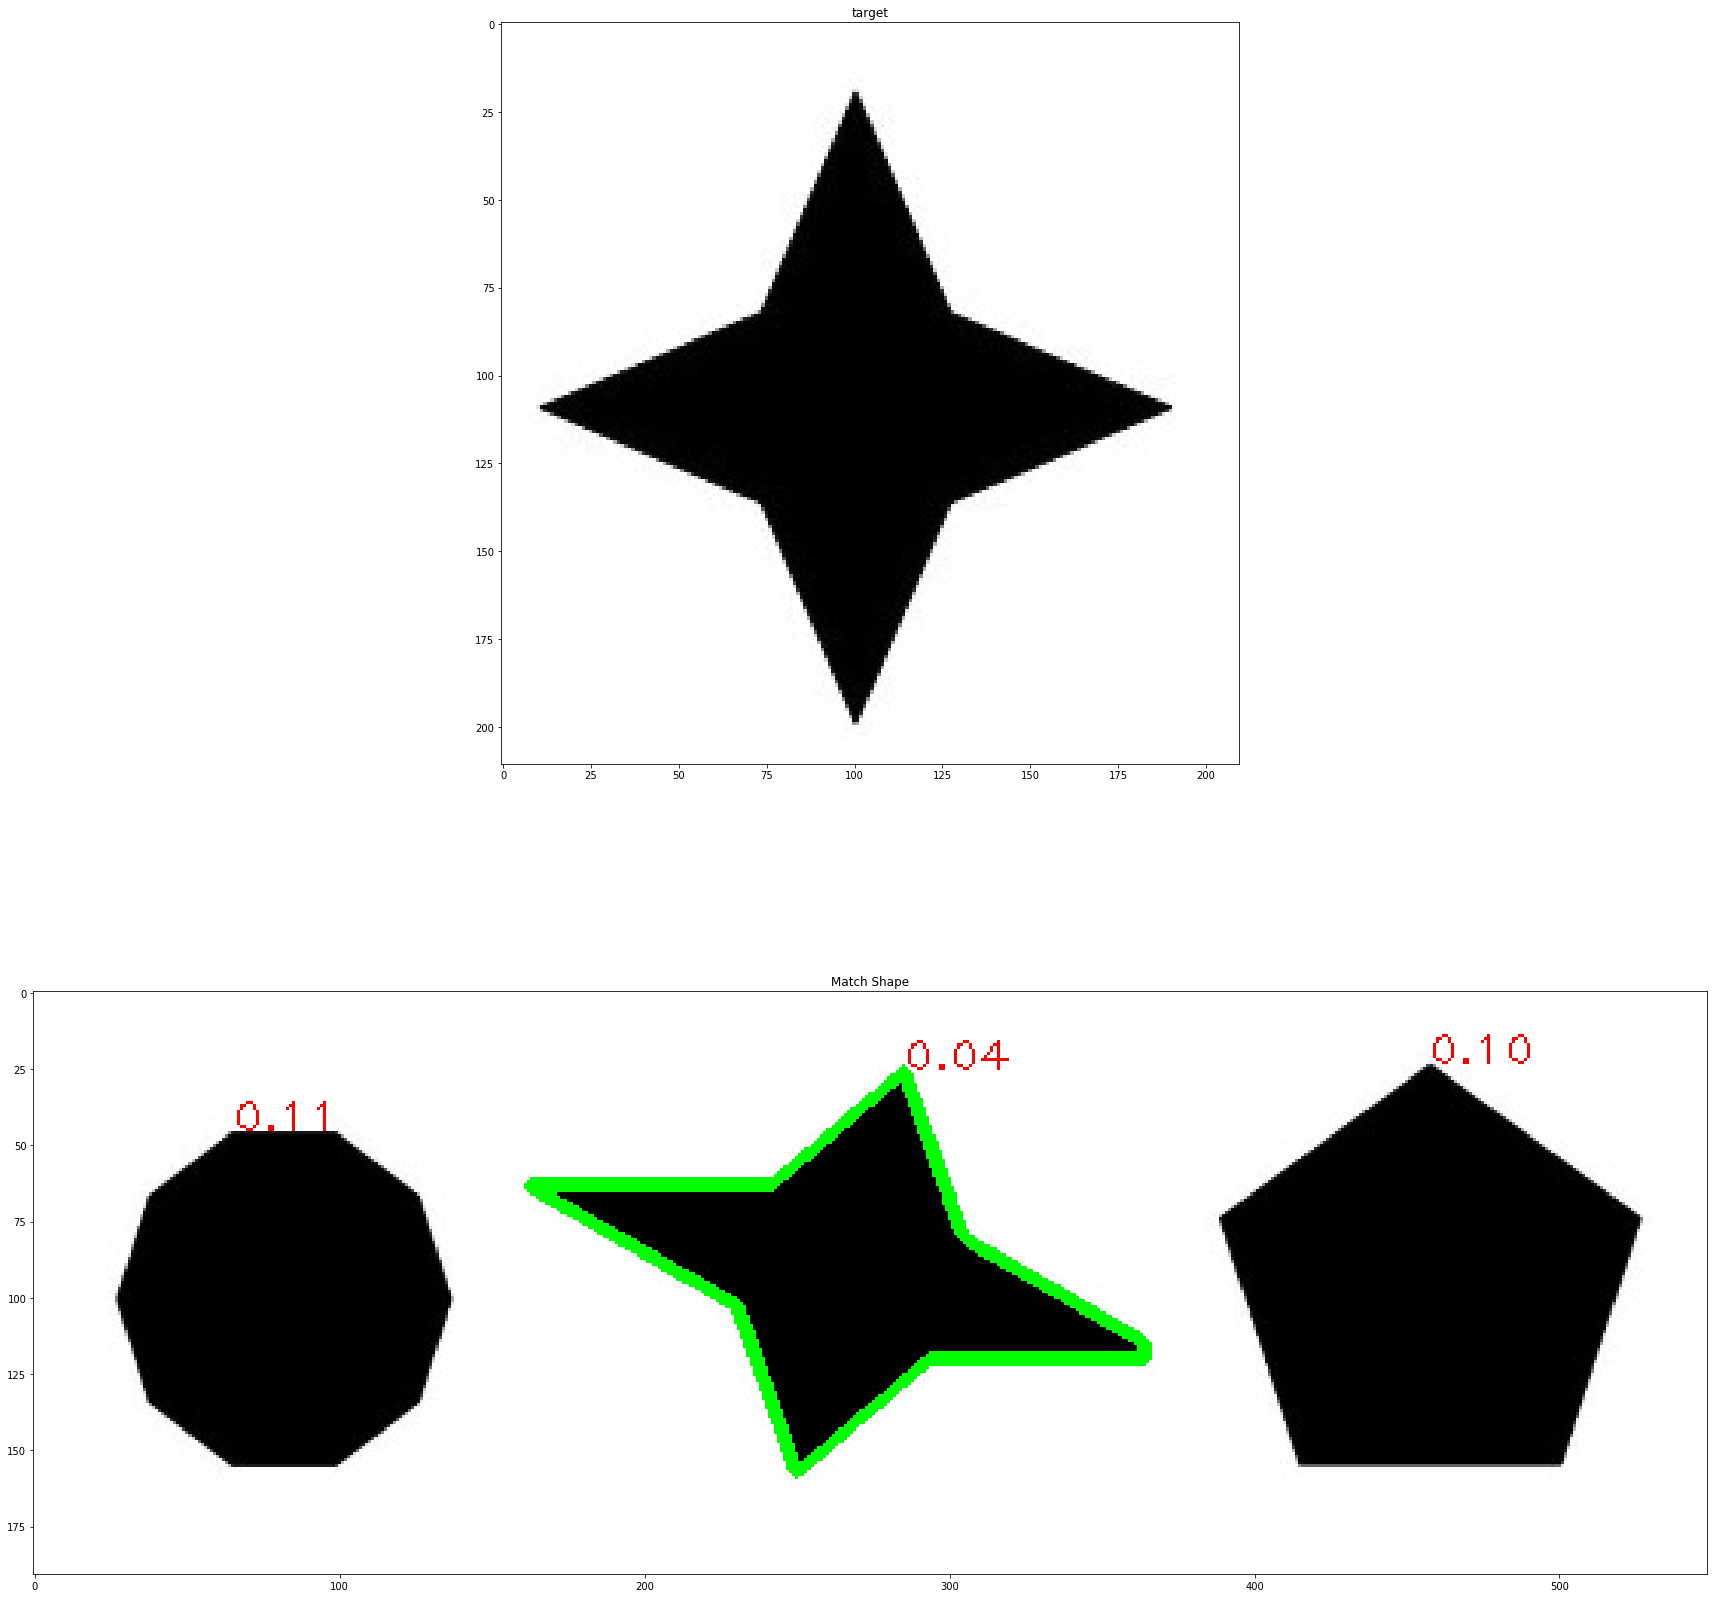

In [19]:
import cv2
import numpy as np

# 매칭을 위한 이미지 읽기
target = cv2.imread('./img/4star.jpg') # 매칭 대상
shapes = cv2.imread('./img/shapestomatch.jpg') # 여러 도형
# 그레이 스케일 변환
targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapesGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapesTh = cv2.threshold(shapesGray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
cntrs_target, _ = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)
cntrs_shapes, _ = cv2.findContours(shapesTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)

# 각 도형과 매칭을 위한 반복문
matchs = [] # 컨투어와 매칭 점수를 보관할 리스트
for contr in cntrs_shapes:
    # 대상 도형과 여러 도형 중 하나와 매칭 실행 ---①
    match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0)
    # 해당 도형의 매칭 점수와 컨투어를 쌍으로 저장 ---②
    matchs.append( (match, contr) )
    # 해당 도형의 컨투어 시작지점에 매칭 점수 표시 ---③
    cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]),\
                    cv2.FONT_HERSHEY_PLAIN, 1,(0,0,255),1 )
# 매칭 점수로 정렬 ---④
matchs.sort(key=lambda x : x[0])
#가장 적은 매칭 점수를 얻는 도형의 컨투어에 선 그리기 ---⑤
cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3)
# cv2.imshow('target', target)
# cv2.imshow('Match Shape', shapes)
# cv2.waitKey()
# cv2.destroyAllWindows()

#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'target':target,'Match Shape':shapes}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   